# Import the required libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os.path

import warnings
# visuallization
import matplotlib.pyplot as plt
# import missingno as msno
import seaborn as sns

#Machine Learning
## model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
## tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import Scaling Model
from sklearn.preprocessing import StandardScaler ## All features have a normal distribution of 0 mean and 1 variance.
from sklearn.preprocessing import MinMaxScaler ## Makes all features have data values between 0 and 1.
from sklearn.preprocessing import MaxAbsScaler ## Makes the absolute value of all features lie between 0 and 1.
from sklearn.preprocessing import RobustScaler
## RobustScaler is similar to StandardScaler.
## However, StandardScaler uses mean and variance, while RobustScaler uses median and quartile.
from sklearn.preprocessing import Normalizer
## The previous four methods use statistics for each feature.

from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

ModuleNotFoundError: No module named 'catboost'

# read the data

In [ ]:
df = pd.read_csv("exams.csv")

In [ ]:
df.head()

# check for null values

In [ ]:
df.isnull().sum()

#### DataFrame haven't any missing(null) values

# minimum, maximum, mean, median, mode, standard deviation etc

In [3]:
df.describe()

NameError: name 'df' is not defined

# total marks
-Total marks (for a student) = sum of the marks/scores in the 3 examinaion for a particular student.

-Percentage marks (for a student) = Total obtained marks divided by total marks, multiplied by 100.

In [4]:
df["Total marks"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = df["Total marks"] / 3
df.head()

NameError: name 'df' is not defined

# detect noisy data

In [1]:
# Box plot
sns.boxenplot(x="gender", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="race/ethnicity", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="parental level of education", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="lunch", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="test preparation course", y="Percentage", data=df)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# # حذف داده‌های پرت
df = df[df["Percentage"] < df["Percentage"].quantile(0.95)]
df = df[df["Percentage"] > df["Percentage"].quantile(0.05)]

In [ ]:
# Box plot
sns.boxenplot(x="gender", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="race/ethnicity", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="parental level of education", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="lunch", y="Percentage", data=df)
plt.show()
sns.boxenplot(x="test preparation course", y="Percentage", data=df)
plt.show()

# BINING

# assign grades to the marks

In [86]:
# Quantile Binning
df['Grade_math 1 bin'] = pd.qcut(df['math score'], 2, labels=['low', 'high'])

df['Grade_math bin 4'] = pd.qcut(df['math score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_math bin 8'] = pd.qcut(df['math score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])



# Quantile Binning
df['Grade_reading 1 bin'] = pd.qcut(df['reading score'], 2, labels=['low', 'high'])

df['Grade_reading 4 bin'] = pd.qcut(df['reading score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_reading 8 bin'] = pd.qcut(df['reading score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])


# Quantile Binning
df['Grade_writing 1 bin'] = pd.qcut(df['writing score'], 2, labels=['low', 'high'])

df['Grade_writing 4 bin'] = pd.qcut(df['writing score'], 4, labels=['very low', 'low', 'high', 'very high'])

df['Grade_writing 8 bin'] = pd.qcut(df['writing score'], 8, labels=['very low', 'low', 'medium low', 'medium high', 'high', 'very high', 'extremely high', 'exceptionally high'])


<AxesSubplot:xlabel='Grade_math 1 bin', ylabel='count'>

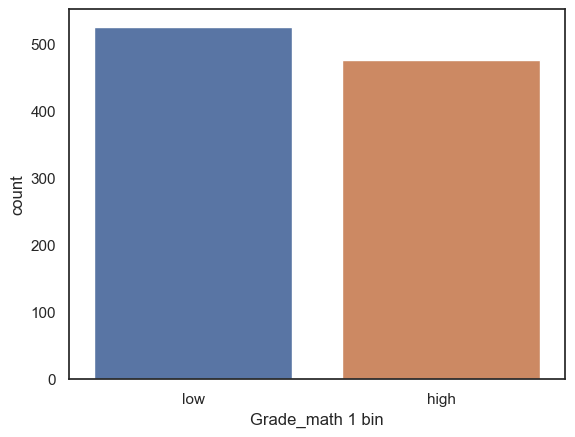

In [87]:
sns.countplot(x='Grade_math 1 bin', data=df)

<AxesSubplot:xlabel='Grade_math bin 4', ylabel='count'>

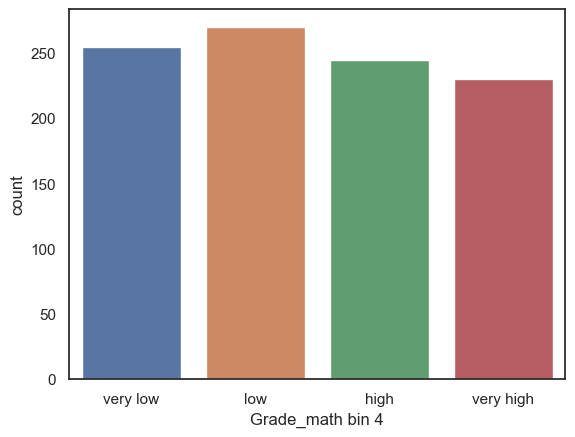

In [88]:
sns.countplot(x='Grade_math bin 4', data=df)


<AxesSubplot:xlabel='Grade_math bin 8', ylabel='count'>

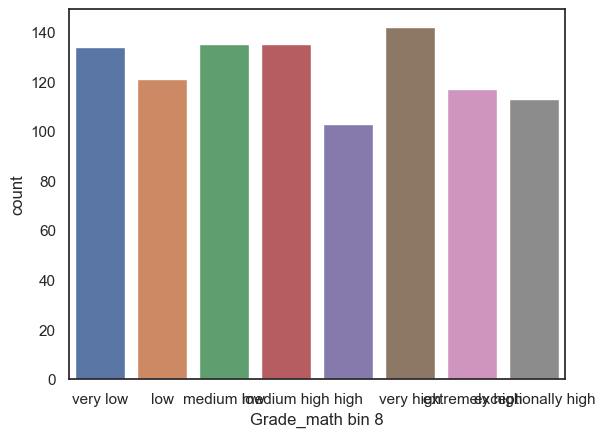

In [89]:
sns.countplot(x='Grade_math bin 8', data=df)

<AxesSubplot:xlabel='Grade_reading 1 bin', ylabel='count'>

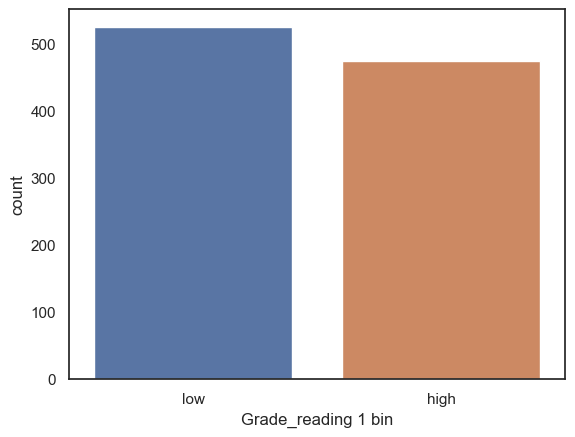

In [90]:
sns.countplot(x='Grade_reading 1 bin', data=df)

<AxesSubplot:xlabel='Grade_reading 4 bin', ylabel='count'>

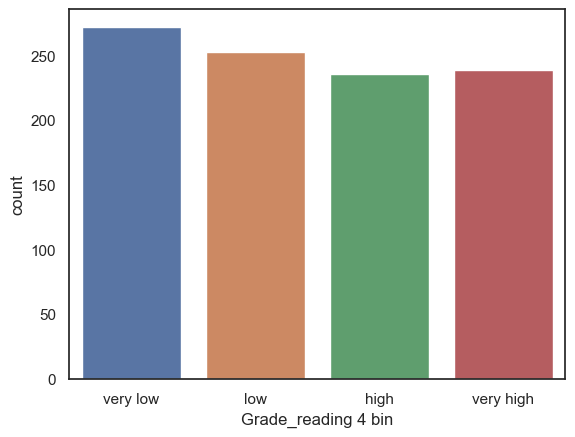

In [91]:
sns.countplot(x='Grade_reading 4 bin', data=df)

<AxesSubplot:xlabel='Grade_reading 8 bin', ylabel='count'>

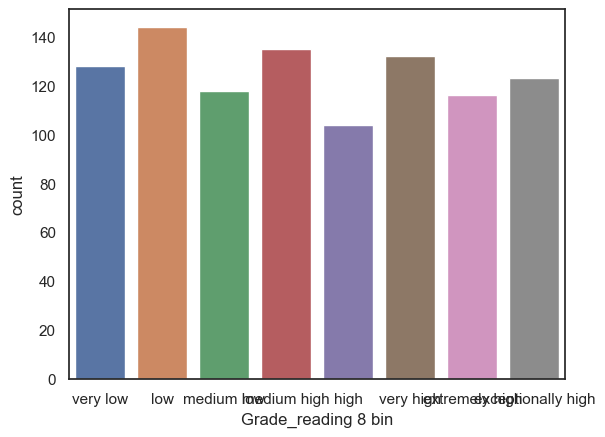

In [92]:
sns.countplot(x='Grade_reading 8 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 1 bin', ylabel='count'>

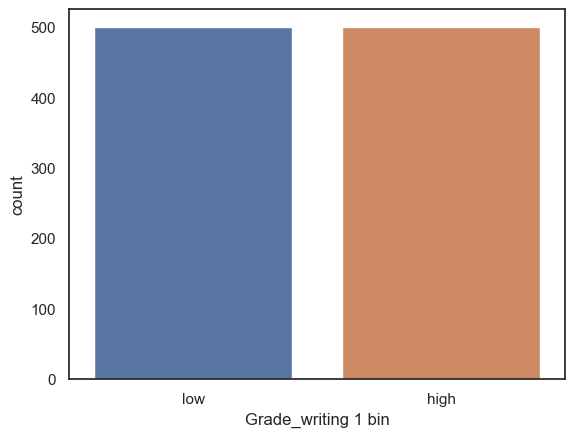

In [93]:
sns.countplot(x='Grade_writing 1 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 4 bin', ylabel='count'>

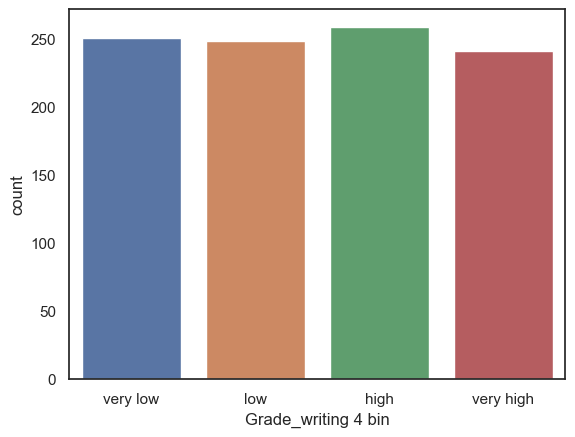

In [94]:
sns.countplot(x='Grade_writing 4 bin', data=df)

<AxesSubplot:xlabel='Grade_writing 8 bin', ylabel='count'>

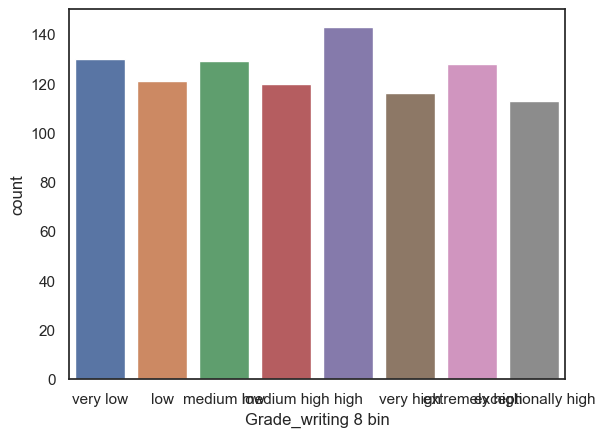

In [95]:
sns.countplot(x='Grade_writing 8 bin', data=df)

In [96]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
df["Grade_math"] = df["math score"].apply(lambda s: Grade(s))
df["Grade_reading"] = df["reading score"].apply(lambda s: Grade(s))
df["Grade_writing"] = df["writing score"].apply(lambda s: Grade(s))
df["Overall_grade"] = df["Percentage"].apply(lambda s: Grade(s))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,...,Grade_reading 1 bin,Grade_reading 4 bin,Grade_reading 8 bin,Grade_writing 1 bin,Grade_writing 4 bin,Grade_writing 8 bin,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333,...,high,high,very high,high,high,high,E,C,D,D
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667,...,low,very low,very low,low,very low,very low,F,F,F,F
2,female,group C,some college,standard,none,66,67,66,199,66.333333,...,low,low,medium high,low,low,medium high,D,D,D,D
3,female,group E,high school,standard,none,61,73,74,208,69.333333,...,high,high,high,high,high,high,D,C,C,D
4,male,group A,some high school,standard,none,48,44,45,137,45.666667,...,low,very low,very low,low,very low,very low,F,F,F,F


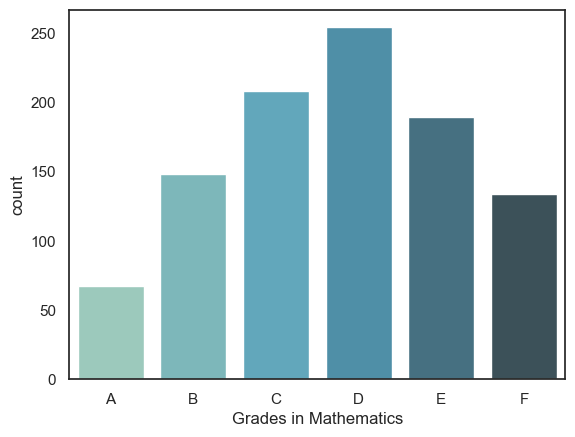

In [97]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Mathematics")

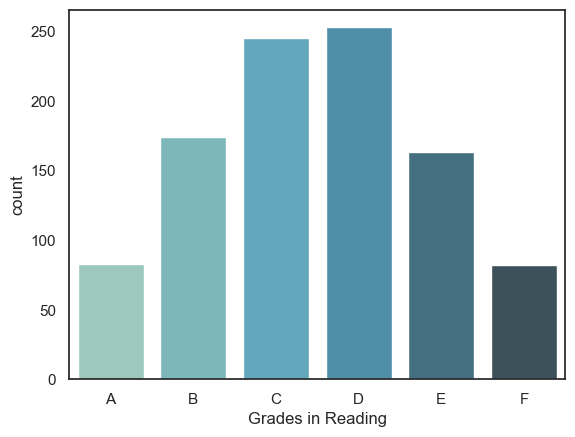

In [98]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_reading", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Reading")

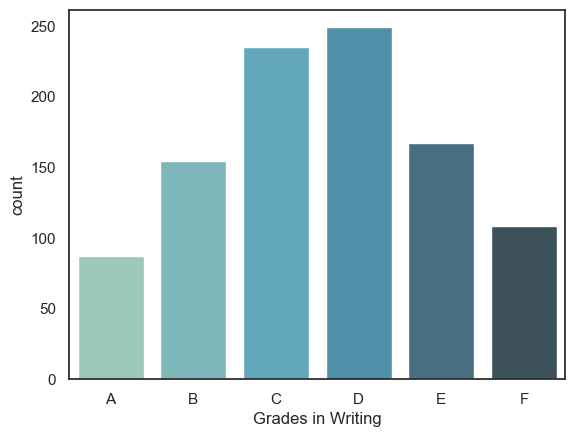

In [99]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Writing")

Two methods for binning were investigated, the first one was quantile binning, which divided each grade into 2, 4, and 8 categories, and in the second method, based on the grades, we placed each grade in a group between A to F and we reached the conclusion by observing the boxplot diagram. More information can be obtained using the second method

# visualizing the data

### Maths Score:

<AxesSubplot:xlabel='math score', ylabel='count'>

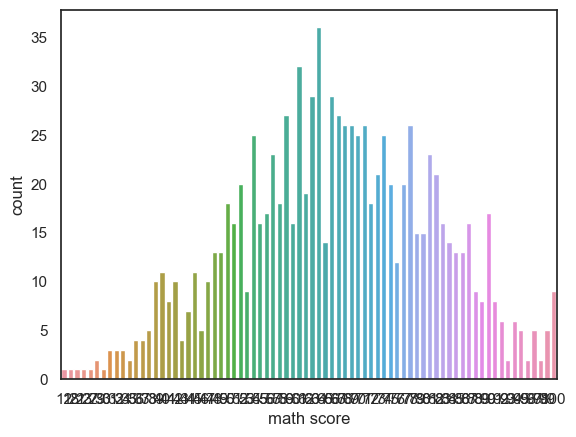

In [48]:
sns.set(style = "white")
sns.countplot(x = "math score", data = df)

### Reading Score:

<AxesSubplot:xlabel='reading score', ylabel='count'>

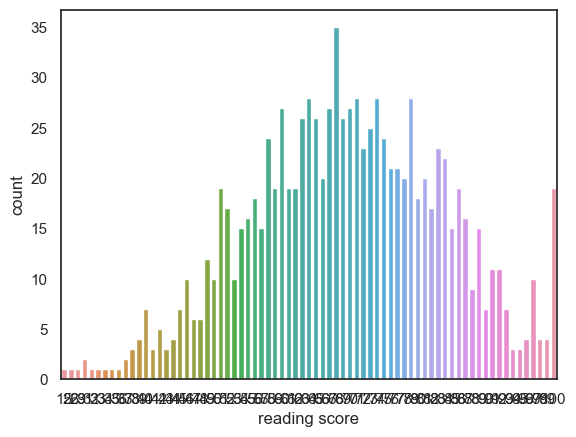

In [49]:
sns.countplot(x = "reading score", data = df)

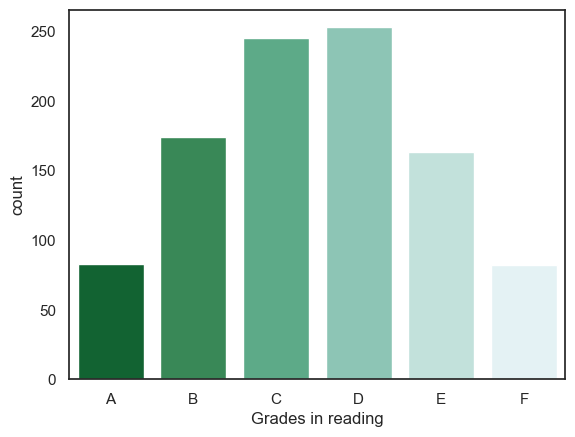

In [50]:
sns.countplot(x= "Grade_reading",data = df, order = order_grade, palette = "BuGn_r")
_ = plt.xlabel("Grades in reading")

### Writing Score:

<AxesSubplot:xlabel='writing score', ylabel='count'>

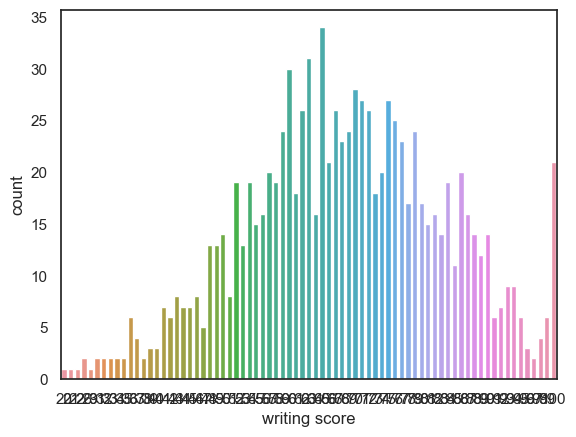

In [16]:
sns.countplot(x = "writing score", data = df)

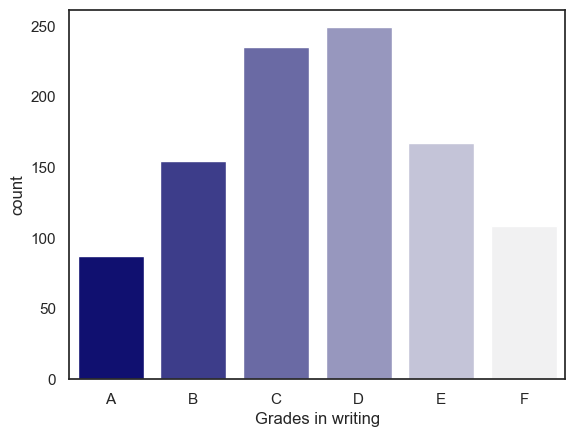

In [17]:
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = sns.light_palette("navy", reverse=True))
_ = plt.xlabel("Grades in writing")

### Overall score

<AxesSubplot:xlabel='Percentage', ylabel='count'>

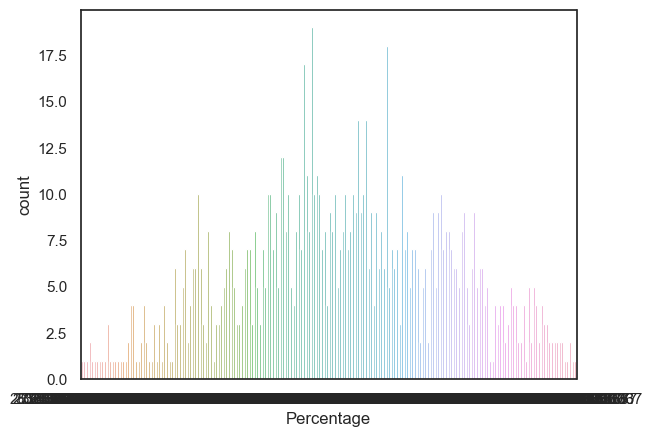

In [18]:
sns.countplot(x = "Percentage", data = df)

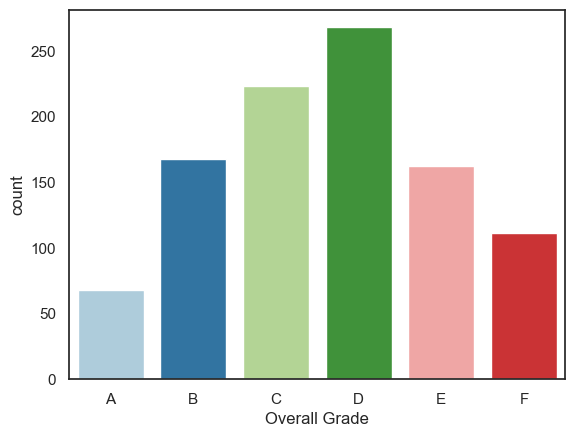

In [19]:
sns.countplot(x = 'Overall_grade', order = order_grade, data = df, palette = 'Paired')
_ = plt.xlabel("Overall Grade")

# correlation

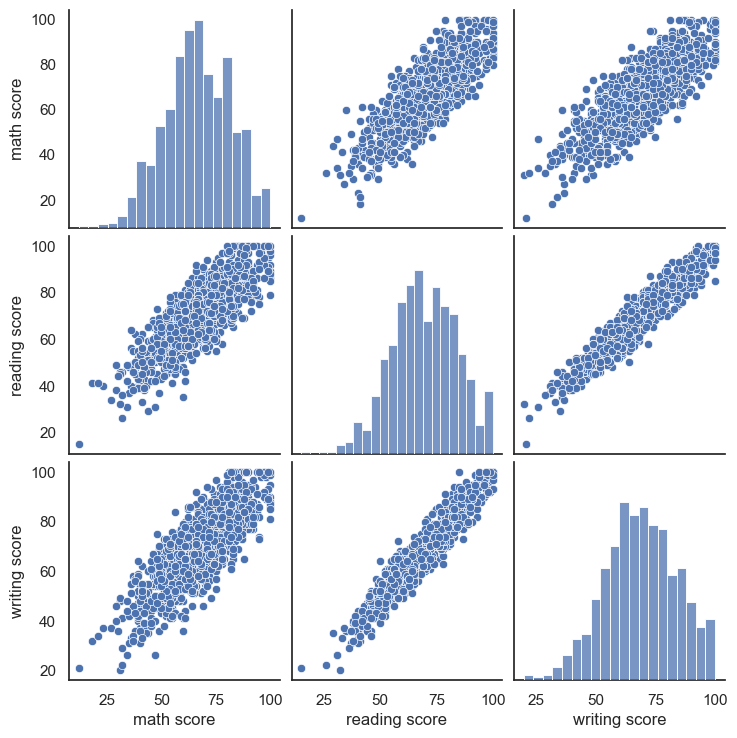

In [20]:
# Pair plot of scores and factors
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'],kind='scatter')
plt.show()


### reading score and writing score are related

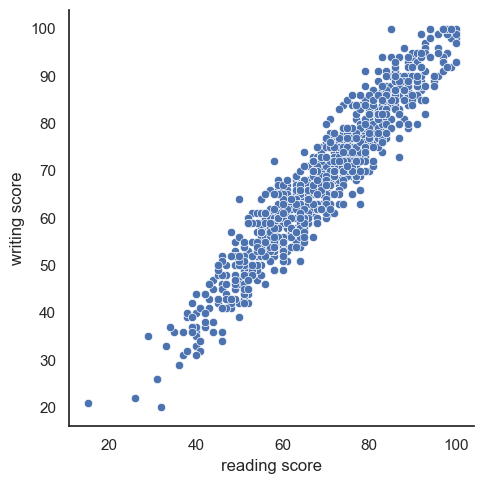

In [21]:
sns.relplot(x='reading score', y = 'writing score', data = df)

#### reading score and writing score are linearly related

In [22]:
r = np.corrcoef(df["reading score"], df["writing score"])[0, 1]
print(r)

0.9535345237579091


# influence of different factors on students performance

### gender

<AxesSubplot:xlabel='gender', ylabel='Percentage'>

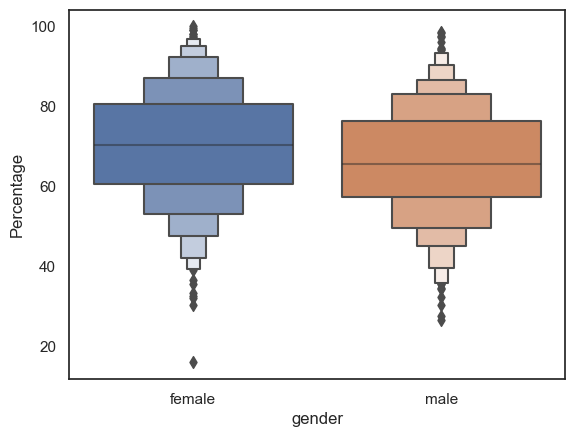

In [23]:
sns.boxenplot(x="gender", y="Percentage", data=df)

<AxesSubplot:xlabel='gender', ylabel='Percentage'>

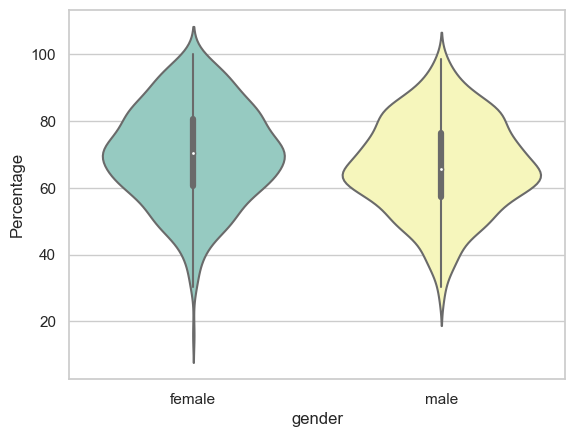

In [24]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'gender', y = 'Percentage', data = df, palette = "Set3")

<AxesSubplot:xlabel='gender', ylabel='count'>

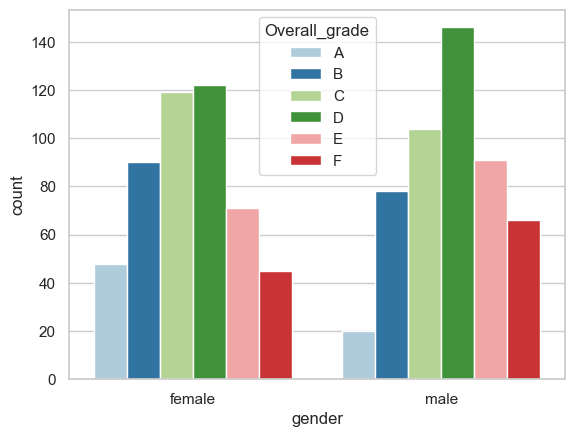

In [25]:
sns.countplot(x = "gender", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

### Race / Ethnicity:

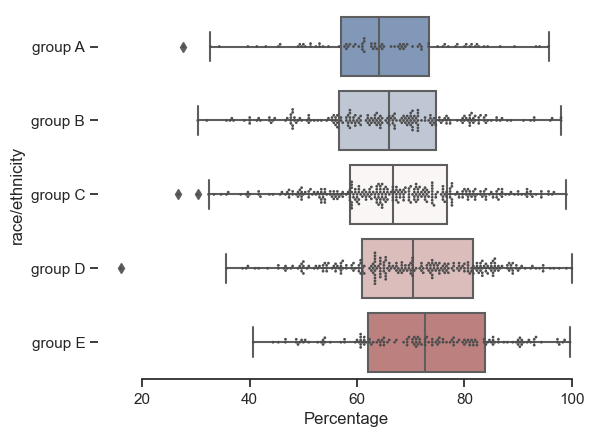

In [26]:
sns.set(style = "ticks")
order_race = ["group A","group B", "group C", "group D", "group E"]
sns.boxplot(x = "Percentage", y = "race/ethnicity", data = df, palette = "vlag", order = order_race)
sns.swarmplot(x = "Percentage", y = "race/ethnicity", data = df, size = 2, color = ".3", linewidth = 0, order = order_race)
sns.despine(trim = True, left = True)

<AxesSubplot:xlabel='race/ethnicity', ylabel='Percentage'>

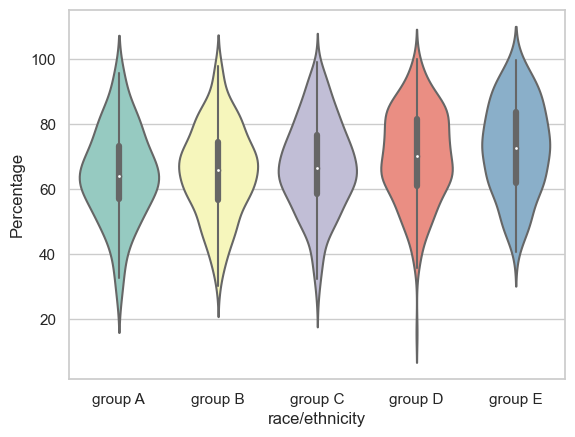

In [27]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'race/ethnicity', y = 'Percentage', data = df, palette = "Set3", order = order_race)

#### students of group E are scored very well among the ethnicity groups

### Lunch:

<AxesSubplot:xlabel='lunch', ylabel='Percentage'>

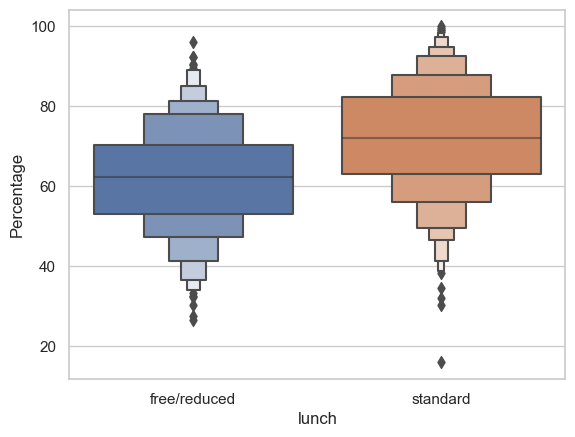

In [28]:
sns.boxenplot(x="lunch", y="Percentage", data=df)

#### students with standard lunch scored better than the others

In [29]:
# sns.countplot(x = "lunch", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

### Test preparation course:

<AxesSubplot:xlabel='test preparation course', ylabel='Percentage'>

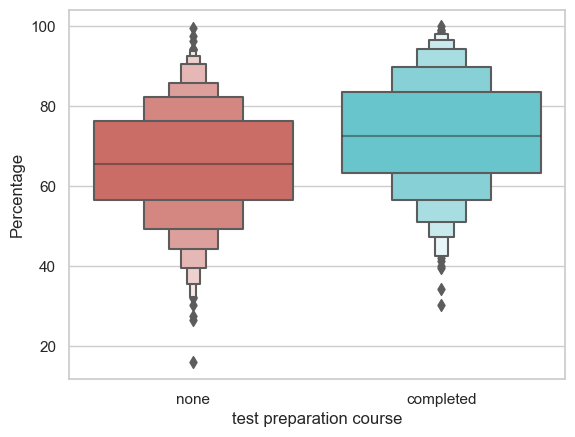

In [30]:
sns.boxenplot(x='test preparation course', y='Percentage',data = df, palette = "hls")

#### students who had completed their test preparation course scored better than the others

In [31]:
# sns.countplot(x = "test preparation course", hue = "Overall_grade",data = df, hue_order = order_grade, palette = 'Paired')
# _ = plt.legend()

### Parental level of education:

In [32]:
# order_edu = ['some high school','high school',"associate's degree","some college","bachelor's degree","master's degree"]
# p = sns.countplot(x='parental level of education', hue='Overall_grade',data=df, order= order_edu, hue_order = order_grade, palette = 'Paired')
# _ = plt.xlabel('Parents level of education')
# _ = plt.setp(p.get_xticklabels(), rotation = 60)

In [33]:
q = sns.violinplot(x="parental level of education", y="Percentage", data = df, order = order_edu,palette = "Paired")
_ = plt.setp(q.get_xticklabels(), rotation = 60)

NameError: name 'order_edu' is not defined

#### the student's whose parents have master's degree performed better than others

# Distribution of scores by column for each test score

In [34]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']

score_column = ["math score","reading score","writing score","Percentage"]
def bias_col_scr(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(20,8))
    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
        for value in df[feature].value_counts().index:
            sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
        ax[row][col].legend()
        ax[row][col].set_title("distribution of <"+scr_type+"> by |-"+feature)

    plt.show()

<< math score >>


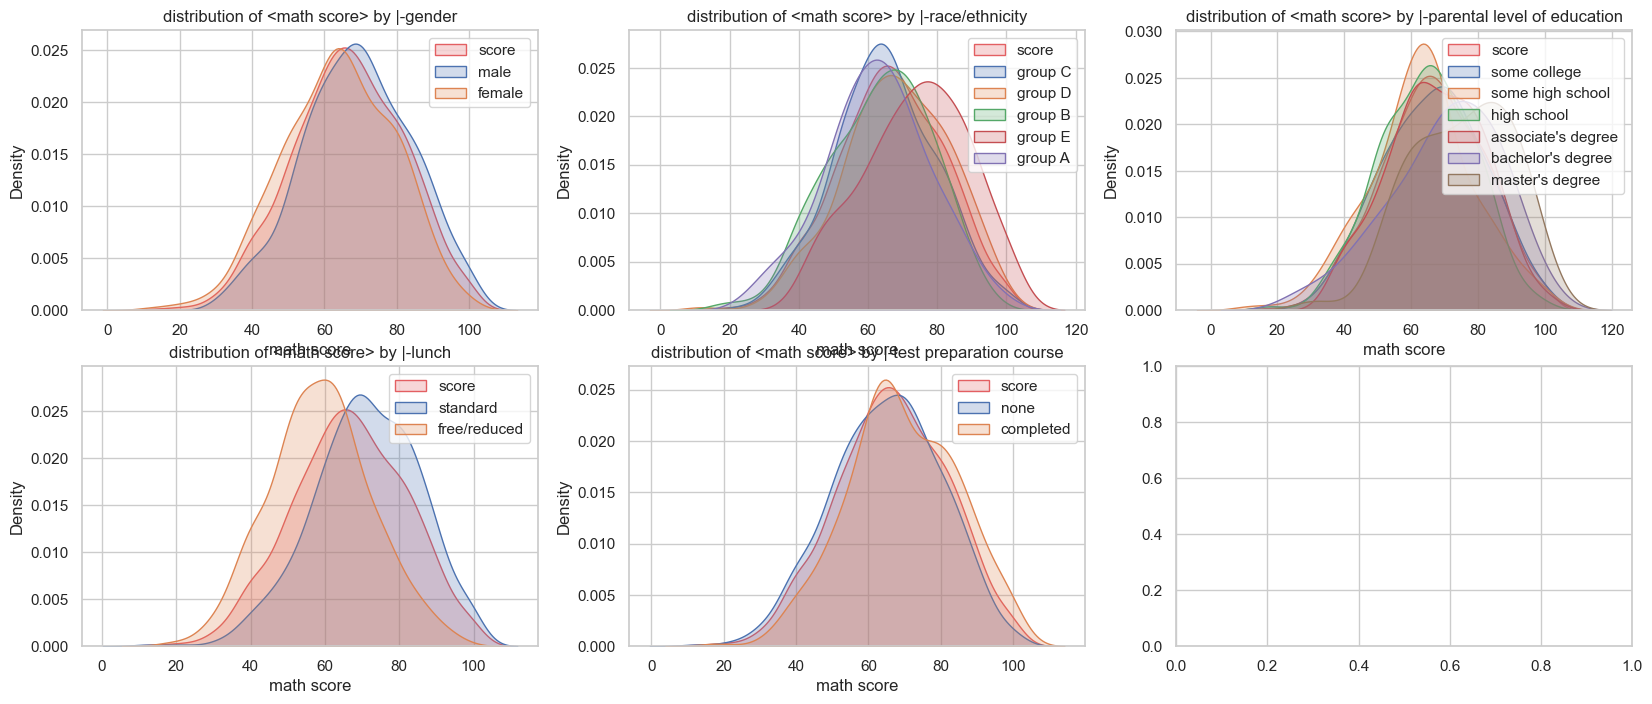

<< reading score >>


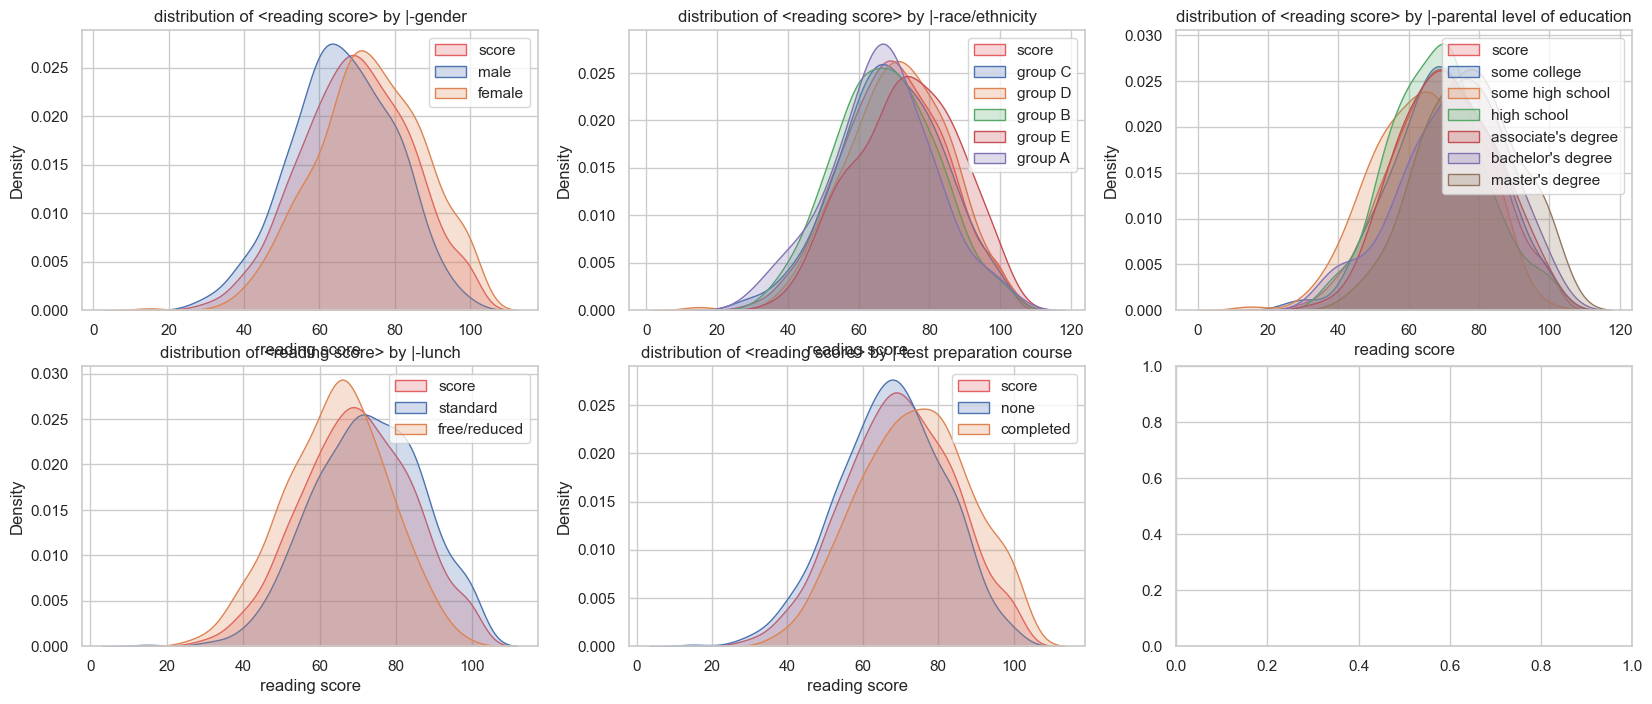

<< writing score >>


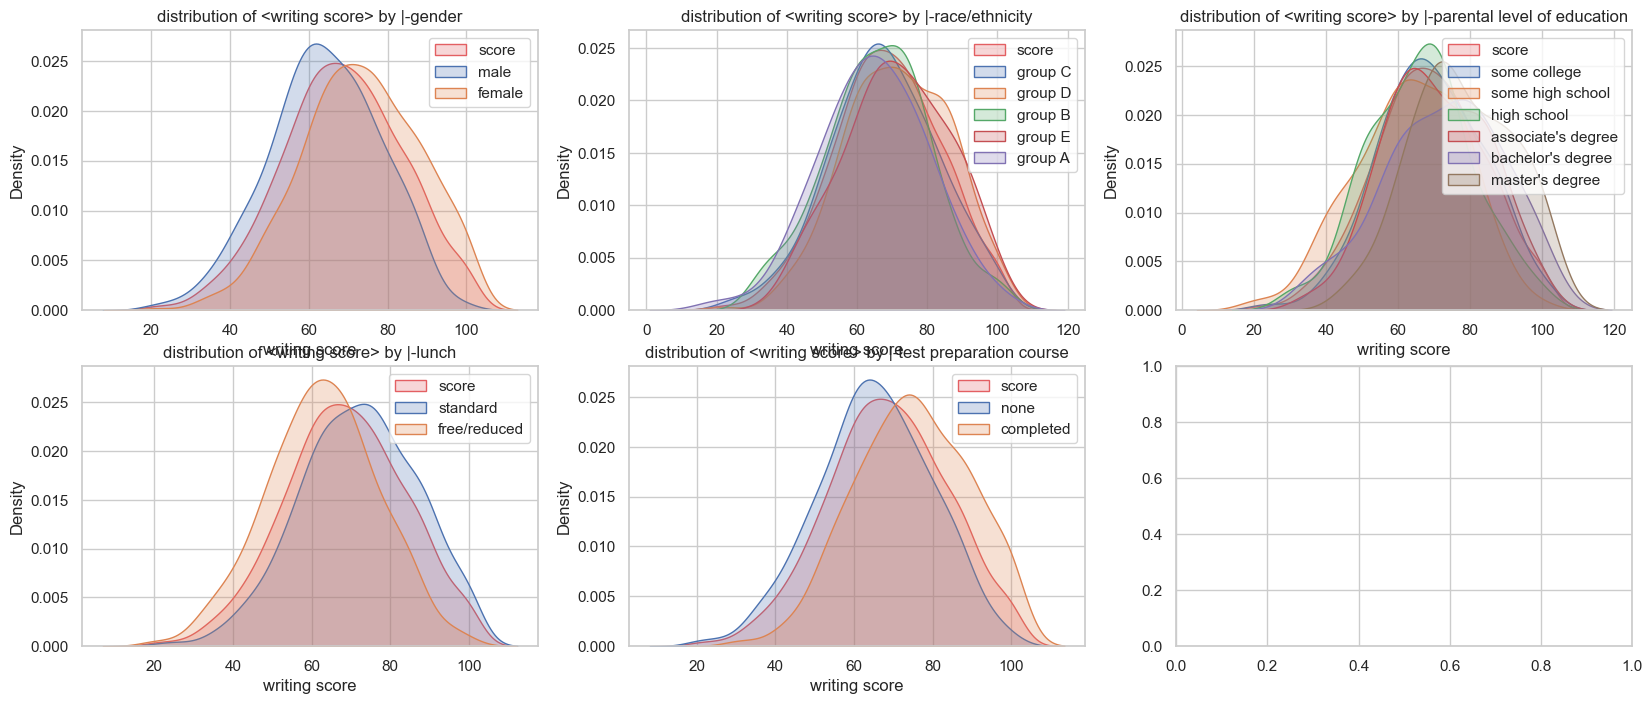

<< Percentage >>


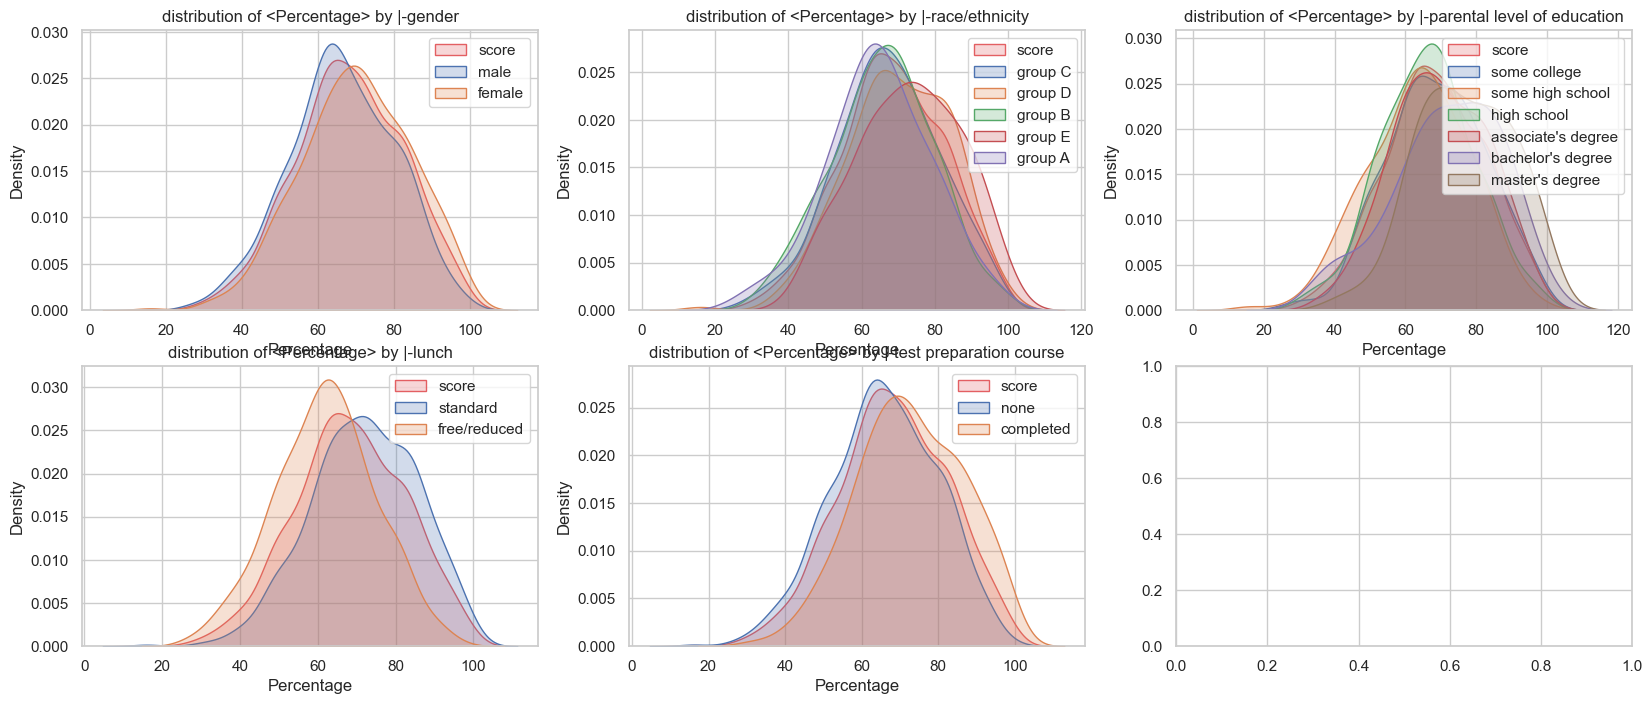

In [35]:
for i in score_column:
    print("<<",i,">>")
    bias_col_scr(i)

# Analysis and visualization of score types for each column

<< math score >>

< gender >
male :  69.00990099009901
female :  63.89090909090909

< race/ethnicity >
group C :  64.80794701986756
group D :  68.15891472868218
group B :  63.42790697674418
group E :  73.72027972027972
group A :  62.68292682926829

< parental level of education >
some college :  66.63346613545816
some high school :  63.03517587939699
high school :  64.29591836734694
associate's degree :  67.37362637362638
bachelor's degree :  69.8425925925926
master's degree :  75.0

< lunch >
standard :  71.0095087163233
free/reduced :  58.72357723577236

< test preparation course >
none :  64.99241274658574
completed :  69.34310850439883


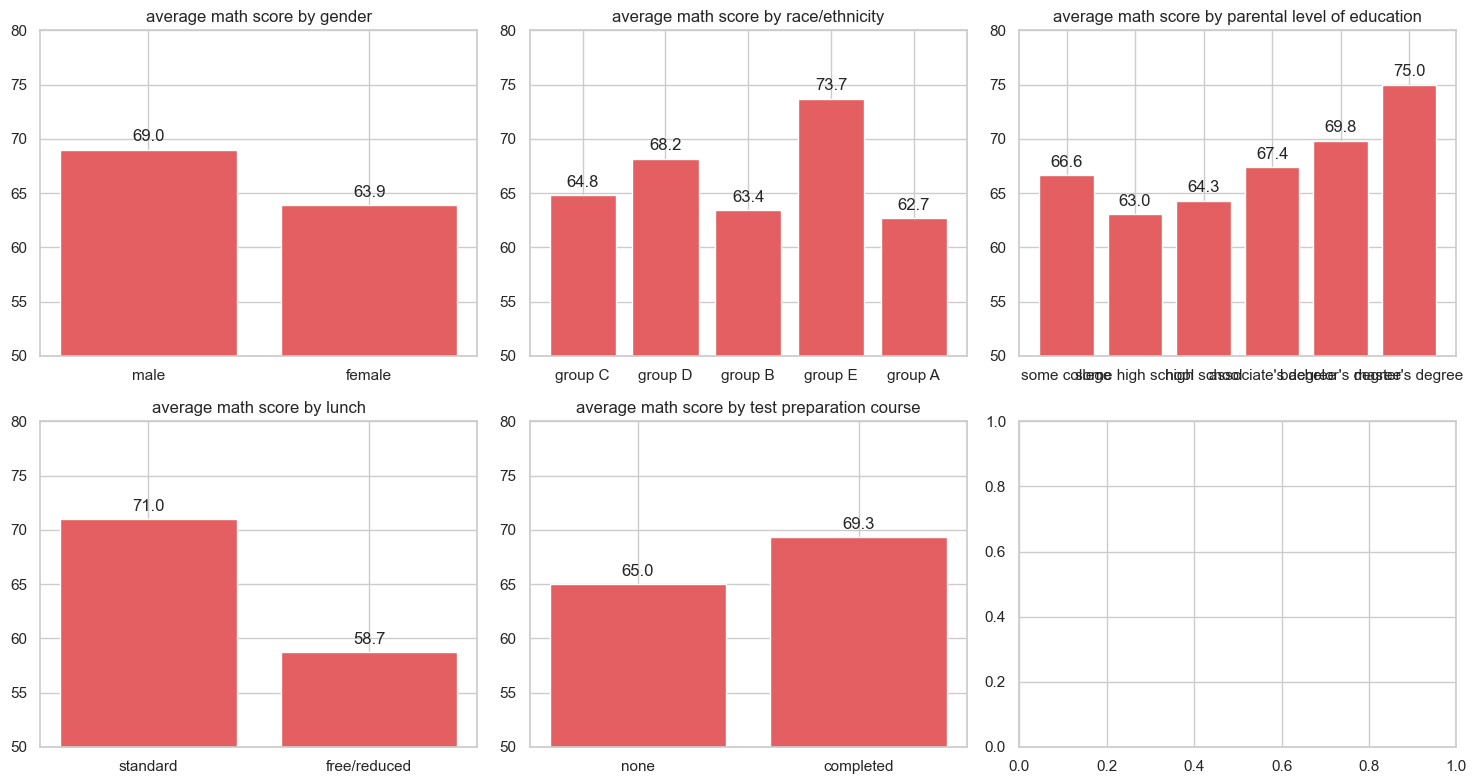

<< reading score >>

< gender >
male :  66.09306930693069
female :  73.14545454545454

< race/ethnicity >
group C :  68.94039735099338
group D :  70.94186046511628
group B :  67.52558139534884
group E :  73.34965034965035
group A :  66.51219512195122

< parental level of education >
some college :  70.19123505976096
some high school :  64.92462311557789
high school :  67.97448979591837
associate's degree :  71.06593406593407
bachelor's degree :  72.68518518518519
master's degree :  77.171875

< lunch >
standard :  72.67036450079239
free/reduced :  64.30623306233062

< test preparation course >
none :  67.40060698027314
completed :  73.80351906158357


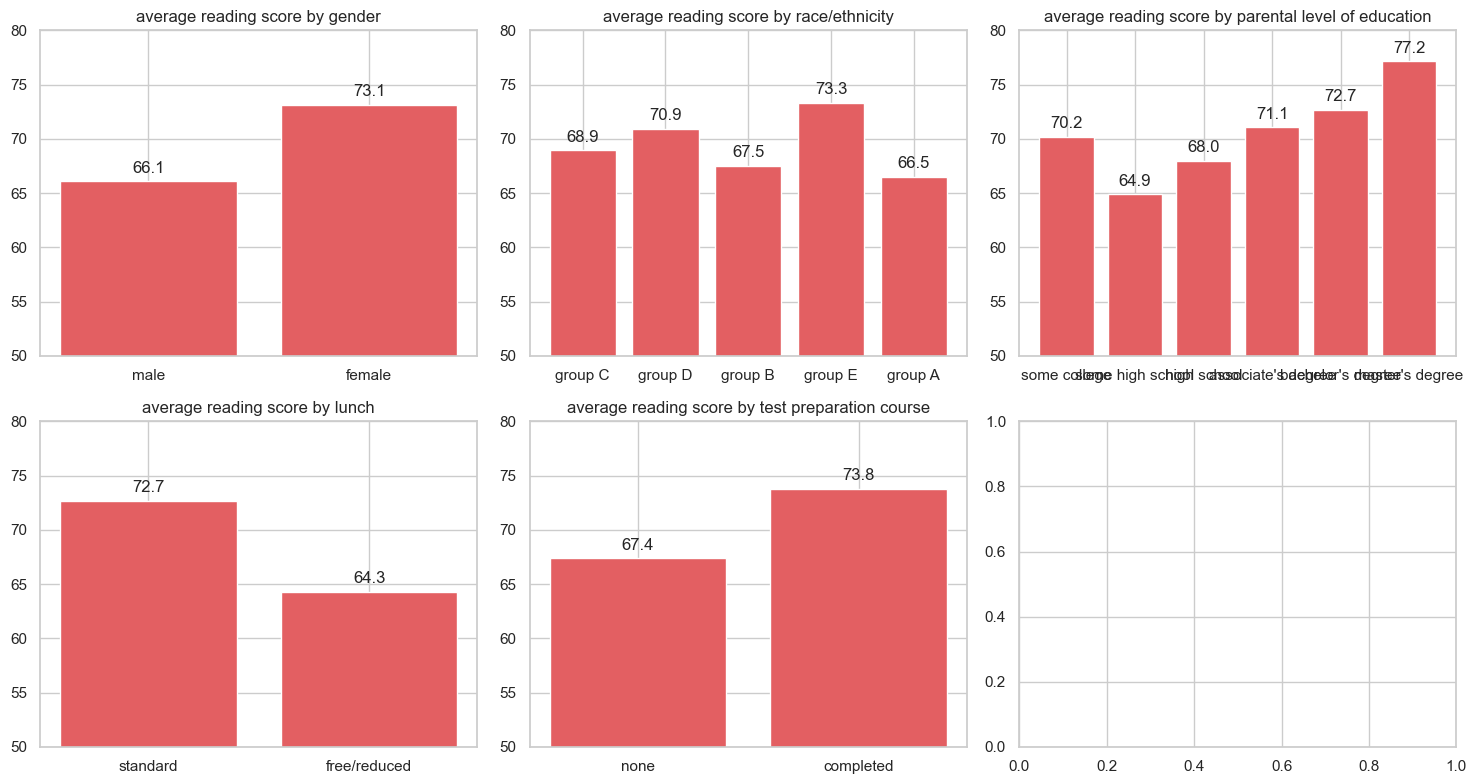

<< writing score >>

< gender >
male :  64.02178217821782
female :  73.02828282828283

< race/ethnicity >
group C :  67.52317880794702
group D :  71.46511627906976
group B :  65.76744186046511
group E :  71.32867132867133
group A :  64.7560975609756

< parental level of education >
some college :  69.12350597609561
some high school :  63.2713567839196
high school :  65.93367346938776
associate's degree :  70.43406593406593
bachelor's degree :  72.46296296296296
master's degree :  77.671875

< lunch >
standard :  71.8621236133122
free/reduced :  62.696476964769644

< test preparation course >
none :  65.23975720789075
completed :  74.74193548387096


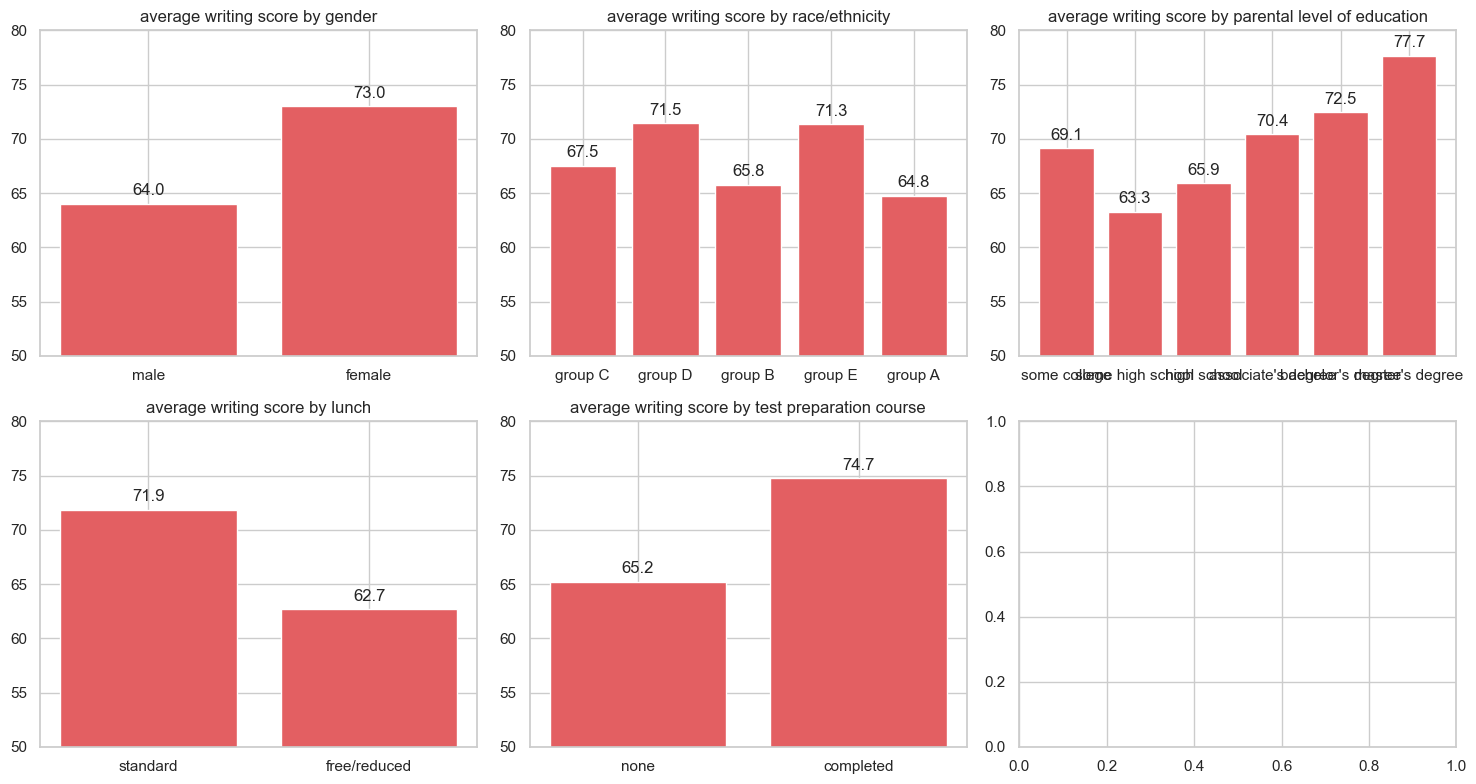

<< Percentage >>

< gender >
male :  66.37491749174916
female :  70.02154882154882

< race/ethnicity >
group C :  67.09050772626931
group D :  70.18863049095607
group B :  65.57364341085271
group E :  72.79953379953379
group A :  64.65040650406505

< parental level of education >
some college :  68.64940239043824
some high school :  63.743718592964825
high school :  66.06802721088435
associate's degree :  69.62454212454213
bachelor's degree :  71.66358024691358
master's degree :  76.61458333333334

< lunch >
standard :  71.8473322768093
free/reduced :  61.90876242095755

< test preparation course >
none :  65.87759231158321
completed :  72.6295210166178


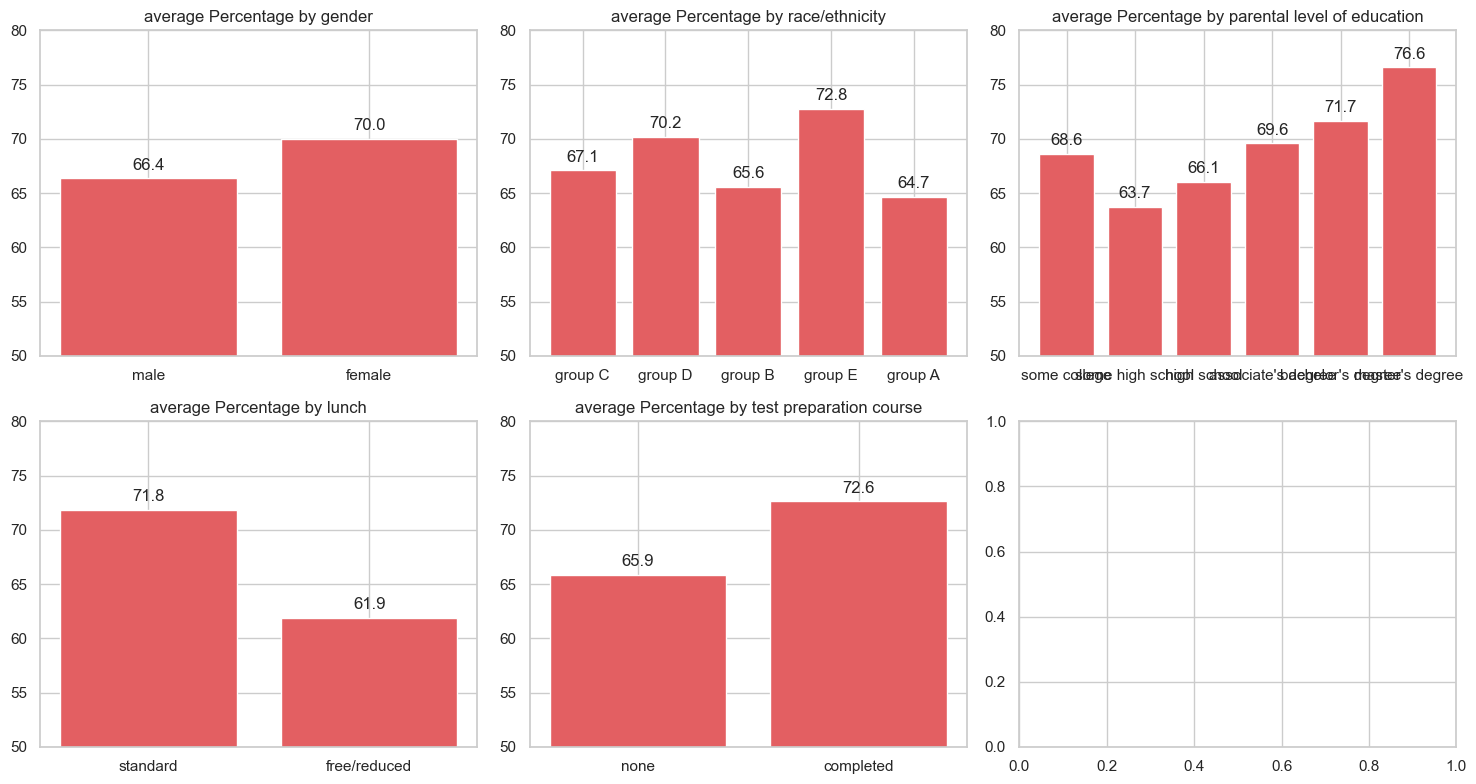

In [36]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']


def bias_col_scr_2(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(15,8))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        print("")
        print("<",feature,">")
        x = []
        y = []
        for j in df[feature].value_counts().index:
            print(j, ": ", np.mean(df[df[feature]==j][scr_type].values))
            x.append(j)
            y.append(np.mean(df[df[feature]==j][scr_type].values))
        plt.sca(ax[i])
        plt.bar(x, y, color='#e35f62')
        for b in range(len(x)):
            height = y[b]
            plt.text(x[b], height + 0.5, '%.1f' % height, ha='center', va='bottom', size=12)
        plt.ylim(50, 80)
        plt.title("average "+scr_type+" by "+feature)
    plt.tight_layout()
    plt.show()
for i in score_column:
    print("<<",i,">>")
    bias_col_scr_2(i)

# Check correlation with HeatMap

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333,E,C,D,D
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667,F,F,F,F
2,female,group C,some college,standard,none,66,67,66,199,66.333333,D,D,D,D
3,female,group E,high school,standard,none,61,73,74,208,69.333333,D,C,C,D
4,male,group A,some high school,standard,none,48,44,45,137,45.666667,F,F,F,F


### standardization of data

In [38]:
data = df[['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Total marks',
 'Percentage',]].copy()


# gender
sex_mapping = {"male":0,"female":1}

#race/ethnicity
group_mapping = {"group A":0.2,"group B":0.4,"group C":0.6,"group D":0.8,"group E":1}

#parental level of education
degree_mapping = {"some college":0.4,
                  "associate's degree":0.6,
                  "high school":0,
                  "some high school":0.2,
                  "bachelor's degree":0.8,
                  "master's degree":1}

# lunch
lunch_mapping = {"standard":1,
                "free/reduced":0}

# test preparation course
course_mapping = {"none":0,
                 "completed":1}



data["gender"] = data["gender"].map(sex_mapping)
data["race/ethnicity"] = data["race/ethnicity"].map(group_mapping)
data["parental level of education"] = data["parental level of education"].map(degree_mapping)
data["lunch"] = data["lunch"].map(lunch_mapping)
data["test preparation course"] = data["test preparation course"].map(course_mapping)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,1,0.8,0.2,0,0,57,76,69,202,67.333333
1,0,0.8,0.0,0,0,39,40,40,119,39.666667
2,1,0.6,0.4,1,0,66,67,66,199,66.333333
3,1,1.0,0.0,1,0,61,73,74,208,69.333333
4,0,0.2,0.2,1,0,48,44,45,137,45.666667


In [39]:
# d_m = []
# d_r = []
# d_w = []
# d_s = []
# for i in range(len(df)):
#     d_m.append(df['math score'].values[i]/100)
#     d_r.append(df['reading score'].values[i]/100)
#     d_w.append(df['writing score'].values[i]/100)
#     d_s.append(df['Percentage'].values[i]/100)
# data['math score'] = d_m
# data['reading score'] = d_r
# data['writing score'] = d_w
# data['Percentage'] = d_s
# data.head()

<AxesSubplot:title={'center':'Correlation of Features'}>

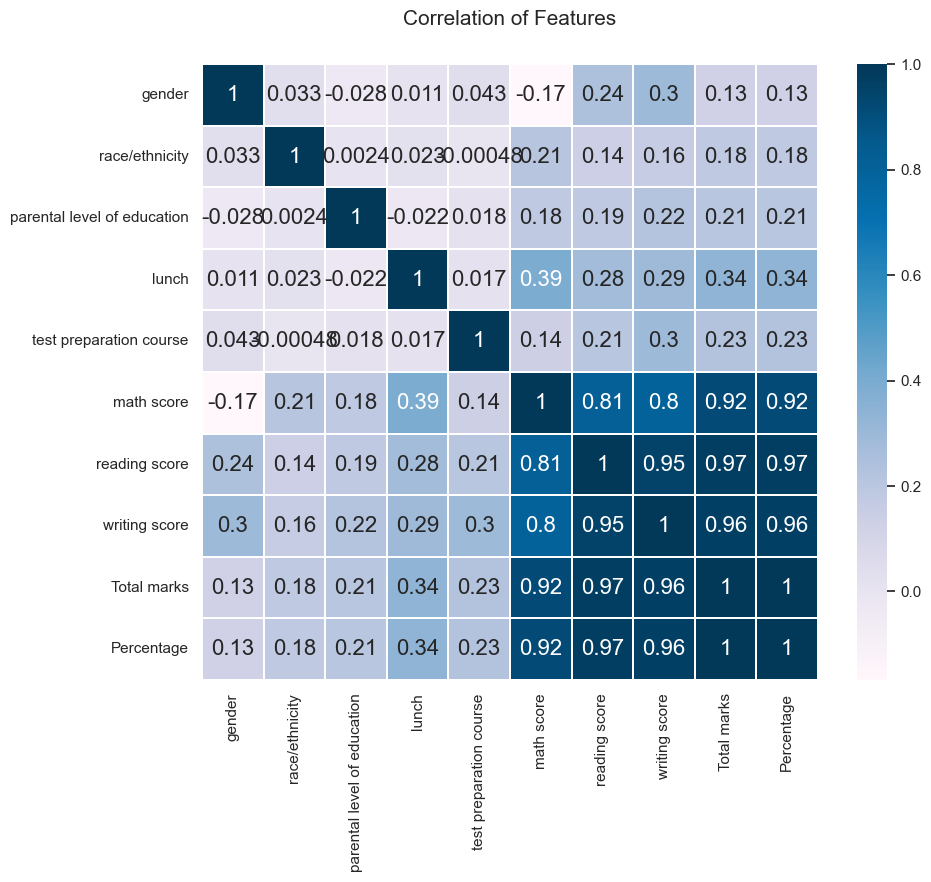

In [40]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# machine learning

In [41]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,1,0.8,0.2,0,0,57,76,69,202,67.333333
1,0,0.8,0.0,0,0,39,40,40,119,39.666667
2,1,0.6,0.4,1,0,66,67,66,199,66.333333
3,1,1.0,0.0,1,0,61,73,74,208,69.333333
4,0,0.2,0.2,1,0,48,44,45,137,45.666667


### add column pass_or_not

In [42]:
pass_or_not = []
for i in range(len(df)):
    if data["Percentage"][i] >= 60:
        pass_or_not.append(1)
    else:
        pass_or_not.append(0)
data["pass_or_not"] = pass_or_not
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,pass_or_not
0,1,0.8,0.2,0,0,57,76,69,202,67.333333,1
1,0,0.8,0.0,0,0,39,40,40,119,39.666667,0
2,1,0.6,0.4,1,0,66,67,66,199,66.333333,1
3,1,1.0,0.0,1,0,61,73,74,208,69.333333,1
4,0,0.2,0.2,1,0,48,44,45,137,45.666667,0


### Split data and target

In [43]:
split_x = data[data.columns[:5]]
split_x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,1,0.8,0.2,0,0
1,0,0.8,0.0,0,0
2,1,0.6,0.4,1,0
3,1,1.0,0.0,1,0
4,0,0.2,0.2,1,0


In [44]:
split_y = data[data.columns[-1]]
split_y.head()

0    1
1    0
2    1
3    1
4    0
Name: pass_or_not, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(split_x, split_y, test_size=0.4, shuffle=False, random_state=1004)

## Compare each model

### k-fold cross validation 

In [46]:
k_fold = KFold(n_splits = 7, shuffle=True, random_state = 0)

In [47]:
knn = KNeighborsClassifier(n_neighbors = 13) #KNN
dtc = DecisionTreeClassifier() # Decision Tree
rfc = RandomForestClassifier(n_estimators=13) #Random Forest
gnb = GaussianNB() # Naive Bayes
svc = SVC() #SVC
gbc = GradientBoostingClassifier()

# Machine learning model
clf_list = [knn,dtc,rfc,gnb,svc,gbc]

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

<BarContainer object of 6 artists>

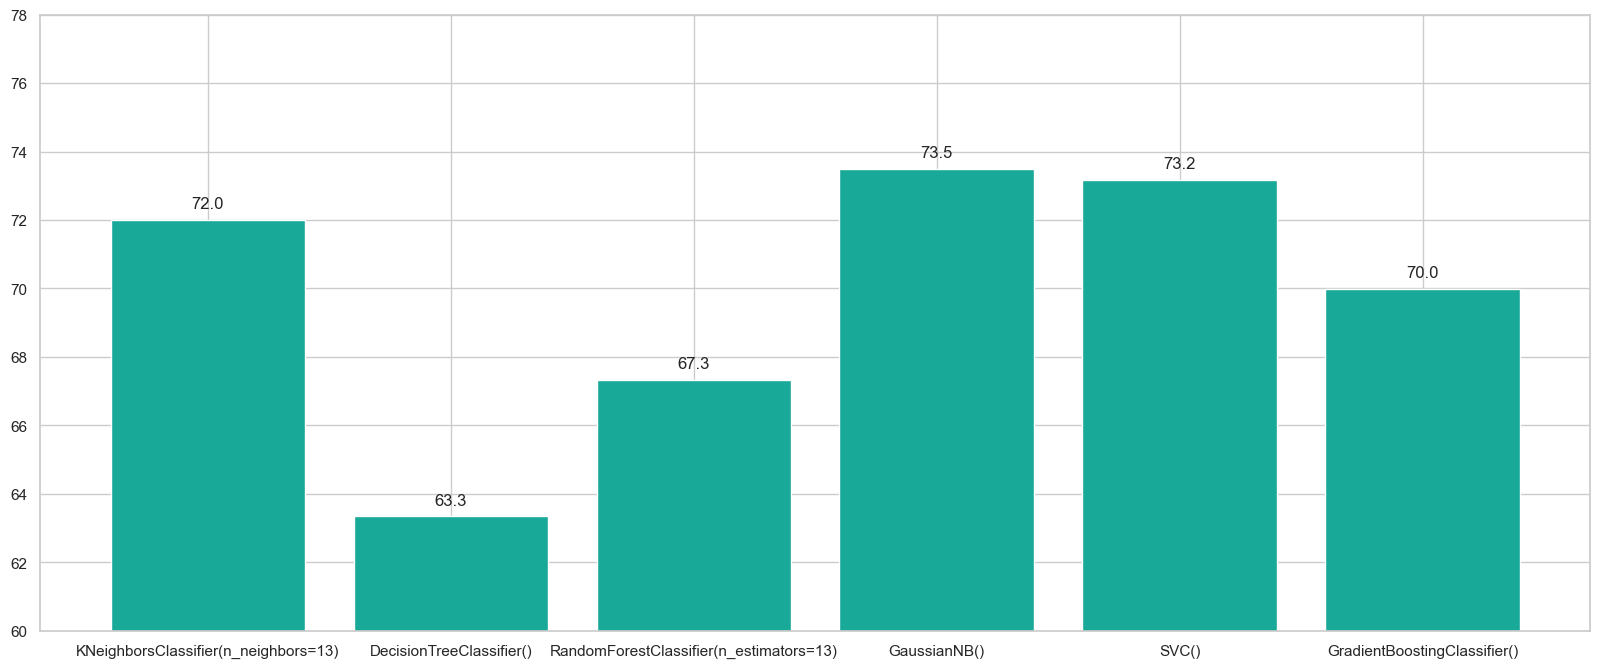

In [48]:
score_list = []
score_name = []
for model in clf_list:
        scoring = "accuracy"
        score = cross_val_score(model, X_train,y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        score_name.append(str(model))
        score = round(np.mean(score)*100,2)
        score_list.append(score) 
        

plt.figure(figsize=(20,8))
x = score_name
y = score_list
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.ylim(60,78)
plt.bar(x, y,color='#18a999')        

GaussianNB , SVC, KNN have highest score in machine learning models with default tuning

C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

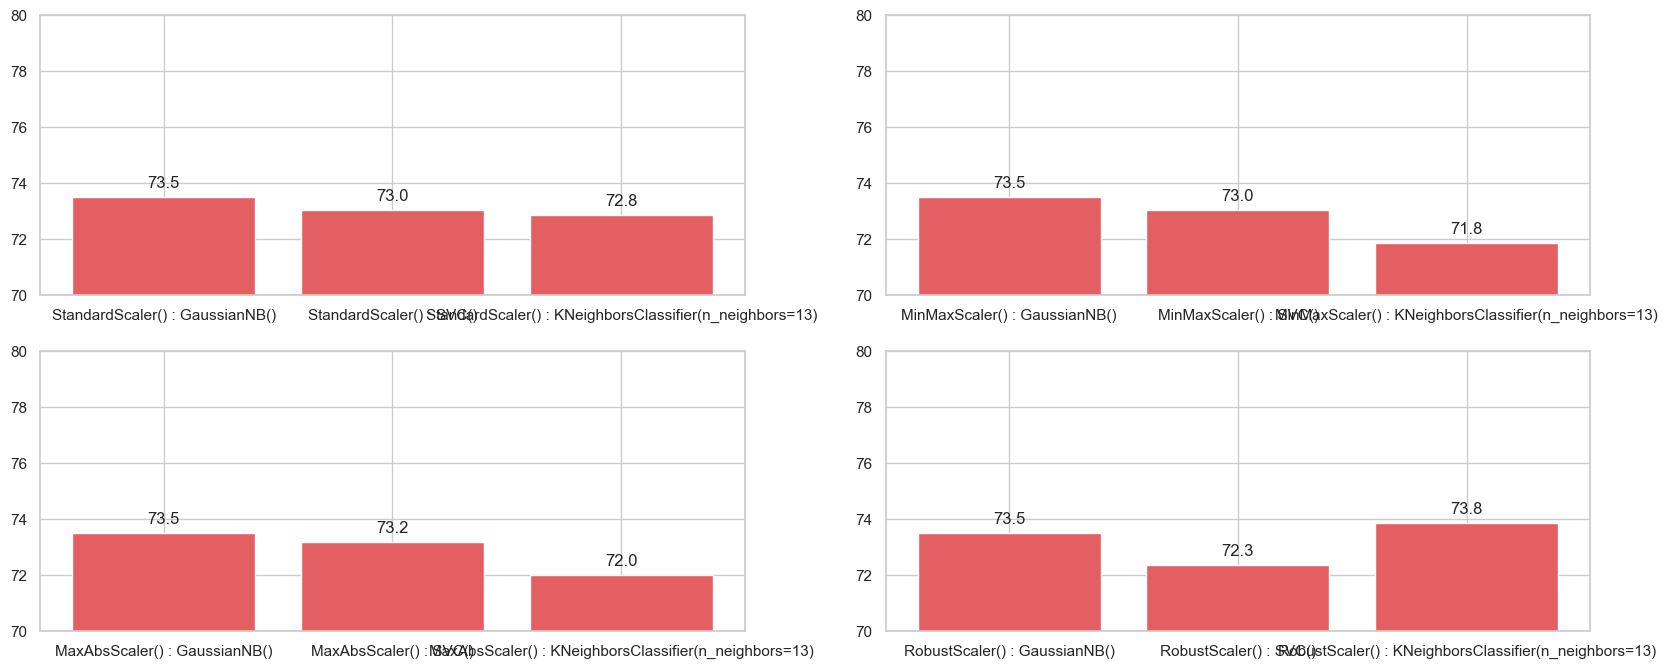

In [49]:
hg_score_name = []
hg_score_score = []
hg_model = [gnb,svc,knn]

# Scaling Model
ssc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rsc = RobustScaler()

scl_list = [ssc,mms,mas,rsc]
for scl in scl_list:
    scl.fit(X_train)
    train_data = scl.transform(X_train)
    test_data = scl.transform(X_test)
    for mdl in hg_model:
        scoring = "accuracy"
        score = cross_val_score(mdl, train_data,y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        hg_score_name.append(str(scl)+" : "+str(mdl))
        score = round(np.mean(score)*100,2)

        hg_score_score.append(score) 
        
        
plt.figure(figsize=(20,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    x = hg_score_name[(3*i):+(3*i)+3]
    y = hg_score_score[(3*i):+(3*i)+3]
    for i in range(len(x)):
        height = y[i]
        plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
    plt.ylim(70,80)
    plt.bar(x,y,color='#e35f62')        

# Find Out Optimal Parameter Value

## Gaussian Naive Bayes

There is different parameters between GaussianNB and SVC model. So I use GridSearchCV to get the optimal value, but seperate into two part with model, set the parameter with meaningful keys by each model.

In [50]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [51]:
# Set Scaling Model
scl = RobustScaler()
scl.fit(X_train)
train_data = scl.transform(X_train)


In [52]:
priors_range = np.arange(0.1, 1, 0.001)
scores = []
# loop over the range of priors and evaluate the performance of the model using 5-fold cross-validation
for prior in priors_range:
    clf = GaussianNB(priors=[prior, 1-prior])
    cv_scores = cross_val_score(clf, train_data, y_train, cv=7)
    scores.append(np.mean(cv_scores))

# find the optimal prior that gives the highest cross-validation score
optimal_prior = priors_range[np.argmax(scores)]
print("Optimal prior: ",optimal_prior)
print("Optimal prior's Score: ",(round(max(scores),4)*100))

Optimal prior:  0.27500000000000013
Optimal prior's Score:  74.66000000000001


In [53]:
optimal_prior = 0.269
clf = GaussianNB(priors=[optimal_prior,1-optimal_prior])
score = cross_val_score(clf, train_data,y_train, cv=7, n_jobs=1, scoring = "accuracy")
score = round(np.mean(score)*100,2)
print(score)

74.49


In [54]:
clf.fit(X_train,y_train)
gnb_test_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.73

## RandomForestClassifier

In [55]:
params = {
    'random_state':(0,10,20,30,50),
    'n_estimators':(10,30,50,100, 200),
    'max_depth' : (3,5, 8, 15),
    'min_samples_leaf' : (4, 8, 18, 20),
    'min_samples_split' : (4, 8, 16, 20)
}
rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('Optimal Hyperparameters:', grid_cv.best_params_)
print('Optimal prediction accuracy: {0:.4f}'.format(grid_cv.best_score_))

Optimal Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 10, 'random_state': 0}
Optimal prediction accuracy: 0.7567


In [56]:
rf_model = RandomForestClassifier(n_estimators=30,random_state=50,max_depth=3,min_samples_leaf=8,min_samples_split=20)
rf_model.fit(X_train, y_train)
rfc_test_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)

0.73

<BarContainer object of 2 artists>

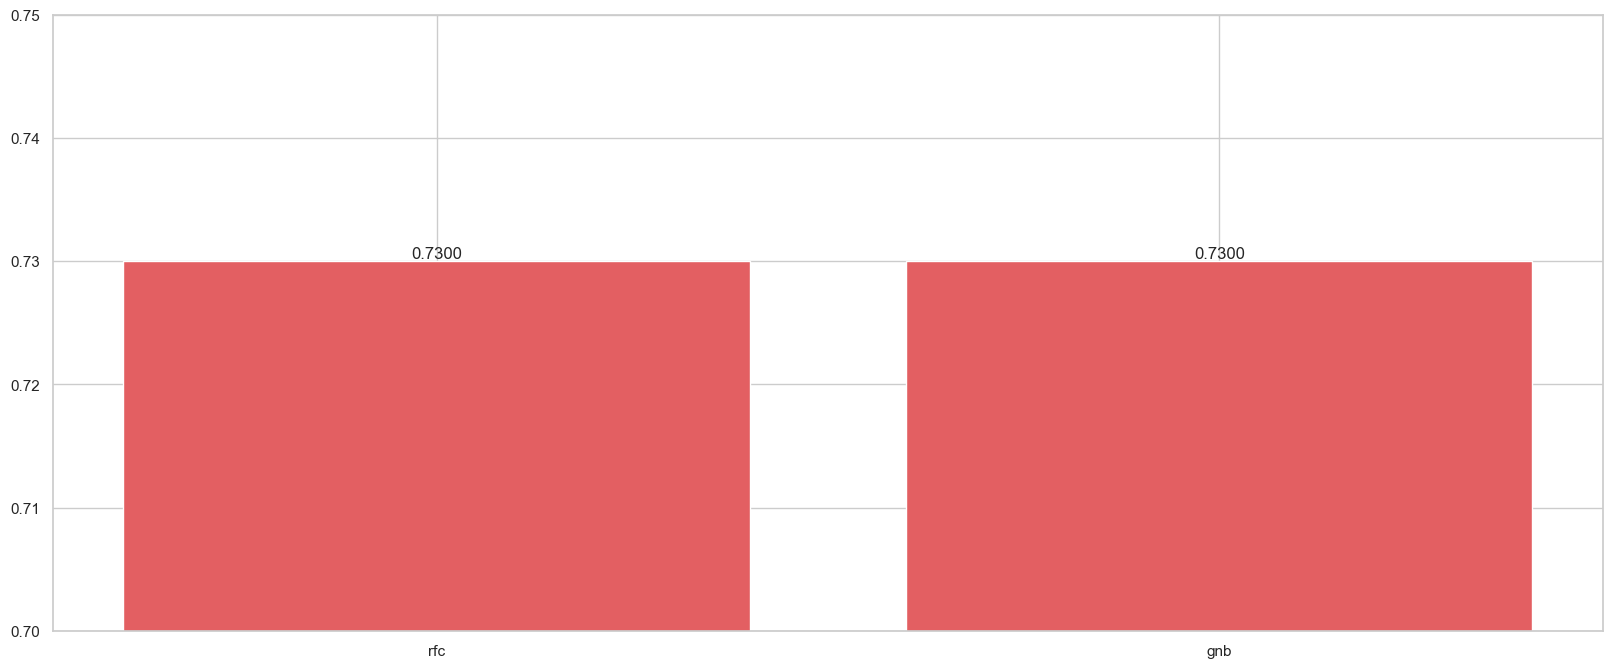

In [57]:
x = ["rfc","gnb"]
y = [rf_model.score(X_test,y_test),clf.score(X_test,y_test)]
plt.figure(figsize=(20,8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height, '%.4f' %height, ha='center', va='bottom', size = 12)
plt.ylim(0.7,0.75)
plt.bar(x,y,color='#e35f62')

In [58]:
gnb_yt = []
rfc_yt = []
for ans in range(len(y_test.values)):
    if gnb_test_pred[ans] == y_test.values[ans]:
        gnb_yt.append("o")
    if gnb_test_pred[ans] != y_test.values[ans]:
        gnb_yt.append("x")
    if rfc_test_pred[ans] == y_test.values[ans]:
        rfc_yt.append("o")
    if rfc_test_pred[ans] != y_test.values[ans]:
        rfc_yt.append("x")
        
print(np.array(gnb_yt))
print("Number of correct answers: ",np.array(gnb_yt).tolist().count("o"))        

['x' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o'
 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'x'
 'o' 'o' 'x' 'x' 'x' 'o' 'x' 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'o'
 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'x' 'x' 'x' 'x' 'o' 'x' 'x'
 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'x'
 'o' 'o' 'x' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o'
 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'o'
 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o'
 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o'
 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'x'
 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x'
 'o' 'x' 'o' 'o' 'o' 'x' 'x' 'x' 'o' 'o' 'x' 'o' 'o

In [59]:
print(np.array(rfc_yt))
print("Number of correct answers: ",np.array(rfc_yt).tolist().count("o"))
print(len(rfc_yt))

['o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o'
 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'x' 'o' 'x'
 'o' 'o' 'x' 'x' 'x' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'o'
 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'x' 'x' 'x' 'x' 'o' 'x' 'x'
 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x'
 'o' 'o' 'x' 'x' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'x' 'x' 'o' 'o' 'o' 'x' 'x' 'x' 'x' 'o'
 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'o'
 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o'
 'o' 'o' 'o' 'x' 'x' 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'x' 'x' 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'x'
 'o' 'x' 'o' 'o' 'o' 'x' 'x' 'x' 'o' 'o' 'x' 'o' 'o

## CatboostRegressor

We have to use classifier to judge 0 or 1, but I'm going to change my mind a little bit here and predict the score through machine learning's 'regressor' model, return it to 1 if the average score is over 60, or else return it to 0 to predict the result and get a score. I used Catboost model, and we can try other a lot of kinds of Regressor model to predict the result.

In [60]:
# Define the parameter grid to search over
param_distributions = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'depth': range(4, 12),
    'l2_leaf_reg': range(1, 10),
    'bagging_temperature': np.arange(0, 2, 0.01)
}

# Create a CatBoostRegressor object
model = CatBoostRegressor(verbose=0)

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42
)

# Fit the search object to the data
search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'learning_rate': 0.03, 'l2_leaf_reg': 2, 'depth': 4, 'bagging_temperature': 0.9500000000000001}
Best score:  -0.015319836953306742


In [61]:
params = {"learning_rate":0.02,
         "l2_leaf_reg":4,
         'depth':5,
         'bagging_temperature':1.75,
         'iterations':300}
cbr = CatBoostRegressor(**params,verbose=0)

cbr.fit(X_train,y_train)

In [62]:
cbr_result = cbr.predict(X_test)

for idx in range(len(cbr_result)):
    if cbr_result[idx] >= 0.6:
        cbr_result[idx] = 1
    else:
        cbr_result[idx] = 0
print(cbr_result)

[0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.

In [63]:
# Check accuracy
cbr_acc = []
for idx in range(len(y_test)):
    if cbr_result[idx] == y_test.values[idx]:
        cbr_acc.append("o")
    else:
        cbr_acc.append('x')

print(cbr_acc)
print(cbr_acc.count('o'))

['x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'o', 'o', 'x', 'o', 'x', 'o', 'o', 'x', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'x', 'x', 'o', 'x', 'o', 'o', 'x', 'x', 'x', 'o', 'o', 'x', 'x', 'o', 'o', 'x', 'o', 'x', 'o', 'o', 'x', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'x', 'x', 'o', 'x', 'o', 'o', 'o', 'x', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'x', 'o', 'x', 'x', 'x', 'o', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'x', 'x', 'o', 'o', 'o', 'x', 'o', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'o', 'o', 'x', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'o', 'x', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'x', 'o', 'x', 'o', 'o',

Through this machine learning result, we were able to confirm the two facts to know between data and models. First of all, it was confirmed that it was a very difficult condition to record high accuracy of 90 points or more through machine learning. The machine learning models used earlier are the most basic and basic models among machine learning models, so using other types of models will result in better results. Second, when the parameter is the default value, models with low accuracy can achieve higher efficacy improvement through parameter tuning. The previous results show that the Naive Bayes model scored the highest score without tuning, but the accuracy obtained by finding the optimized tuning value of the Random Forest Classifier model showed higher accuracy than the tuned Navie Bayes and Catboost model. Therefore, since the results may vary depending on the tuning method and parameter setting method of each model, I think it is the most efficient way to find a machine learning model that is best suited to the data by improving understanding of the characteristics and performance of each model.

